In [ ]:
# Importations de base
import os
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.metrics import mean_squared_error, r2_score
import joblib

# Réglages d'affichage
pd.set_option('display.max_columns', None)
sns.set(style='whitegrid')

In [ ]:
# Chemin vers les données (ajustez si nécessaire)
data_path = os.path.join('Projet', 'clustered_data.csv')
print('Chargement :', data_path)
df = pd.read_csv(data_path)

# Aperçu rapide
print('Taille :', df.shape)
display(df.head())
display(df.dtypes)
display(df.describe(include='all').T)

Chargement : Projet\clustered_data.csv
Taille : (1105309, 15)


,Nombre_Distribution_par_Theme,Taux_Distribution_Theme,Densité_par_habitant,Nombre_Actions_Annuel,Nombre_Lieux_Activite,fk_SE_Id,Time_id_fk,Score_Reference_Croisee,Taux_Partenariat,Score_Cluster_Territoire,fk_RNA_ID,fk_Geographie_Id,classe_densite,classe_densite_encoded,cluster
0,90.0,2.0,5134.0,2489.0,0.0,0.527768,0.0,0.024488,0.0,0.570744,2489.0,2674.30303,G,6.0,Cluster C
1,90.0,2.0,5134.0,2489.0,0.0,0.527768,0.0,0.024488,0.0,0.570744,2489.0,2674.30303,G,6.0,Cluster C
2,90.0,2.0,5134.0,2489.0,0.0,0.527768,0.0,0.024488,0.0,0.570744,2489.0,2674.30303,G,6.0,Cluster C
3,90.0,2.0,5134.0,2489.0,0.0,0.527768,0.0,0.024488,0.0,0.570744,2489.0,2674.30303,G,6.0,Cluster C
4,90.0,2.0,5134.0,2489.0,0.0,0.527768,0.0,0.024488,0.0,0.570744,2489.0,2674.30303,G,6.0,Cluster C


Nombre_Distribution_par_Theme    float64
Taux_Distribution_Theme          float64
Densité_par_habitant             float64
Nombre_Actions_Annuel            float64
Nombre_Lieux_Activite            float64
fk_SE_Id                         float64
Time_id_fk                       float64
Score_Reference_Croisee          float64
Taux_Partenariat                 float64
Score_Cluster_Territoire         float64
fk_RNA_ID                        float64
fk_Geographie_Id                 float64
classe_densite                    object
classe_densite_encoded           float64
cluster                           object
dtype: object

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Nombre_Distribution_par_Theme,1105309.0,NaN,NaN,NaN,49.912282,28.514226,1.0,26.0,49.0,76.0,99.0
Taux_Distribution_Theme,1105309.0,NaN,NaN,NaN,1.653085,0.70534,1.0,1.0,2.0,2.0,4.0
Densité_par_habitant,1105309.0,NaN,NaN,NaN,1293.613086,1068.457604,1.0,690.0,1556.0,1556.0,5501.0
Nombre_Actions_Annuel,1105309.0,NaN,NaN,NaN,3003.915957,1872.51404,2.0,938.0,3434.0,4783.0,6206.0
Nombre_Lieux_Activite,1105309.0,NaN,NaN,NaN,0.47693,1.673528,0.0,0.0,0.0,0.0,9.0
fk_SE_Id,1105309.0,NaN,NaN,NaN,0.877289,0.479962,0.000142,0.458059,0.924107,1.350936,1.689884
Time_id_fk,1105309.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Score_Reference_Croisee,1105309.0,NaN,NaN,NaN,0.86661,0.498987,0.000921,0.44042,0.853542,1.35767,1.644714
Taux_Partenariat,1105309.0,NaN,NaN,NaN,0.016812,0.313615,0.0,0.0,0.0,0.0,7.0
Score_Cluster_Territoire,1105309.0,NaN,NaN,NaN,0.923333,0.384001,0.04219,0.699233,0.699233,1.454805,2.191573


In [ ]:
# Suggestion automatique des cibles ; vous pouvez les remplacer ci‑dessous.
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()
print('Colonnes numériques :', numeric_cols)
print('Colonnes catégorielles :', cat_cols)

# Heuristiques pour la sélection automatique :
# - Pour la classification : préférer une colonne entière petite ou binaire (valeurs uniques <= 10)
# - Pour la régression : préférer une colonne numérique avec de nombreuses valeurs uniques
classification_suggestion = None
regression_suggestion = None
for c in numeric_cols:
    nunique = df[c].nunique(dropna=True)
    if classification_suggestion is None and nunique <= 6 and nunique >= 2:
        classification_suggestion = c
    if regression_suggestion is None and nunique > 10:
        regression_suggestion = c

print('Cible classification suggérée (auto) :', classification_suggestion)
print('Cible régression suggérée (auto) :', regression_suggestion)

# --- UTILISATEUR : définissez ces cibles si nécessaire ---
# Exemple : classification_target = 'has_disease'
classification_target = classification_suggestion  # <-- remplacez si nécessaire
regression_target = regression_suggestion        # <-- remplacez si nécessaire

print('\nAprès remplacement :')
print('classification_target =', classification_target)
print('regression_target =', regression_target)

Colonnes numériques : ['Nombre_Distribution_par_Theme', 'Taux_Distribution_Theme', 'Densité_par_habitant', 'Nombre_Actions_Annuel', 'Nombre_Lieux_Activite', 'fk_SE_Id', 'Time_id_fk', 'Score_Reference_Croisee', 'Taux_Partenariat', 'Score_Cluster_Territoire', 'fk_RNA_ID', 'fk_Geographie_Id', 'classe_densite_encoded']
Colonnes catégorielles : ['classe_densite', 'cluster']
Cible classification suggérée (auto) : Taux_Distribution_Theme
Cible régression suggérée (auto) : Nombre_Distribution_par_Theme

Après remplacement :
classification_target = Taux_Distribution_Theme
regression_target = Nombre_Distribution_par_Theme


## Aide : préparation des variables et pipeline de prétraitement
Le code ci‑dessous détecte les variables numériques et catégorielles, construit un `ColumnTransformer` et retourne les jeux d'entraînement et de test.

In [ ]:
def prepare_data(df, target, test_size=0.2, random_state=42, drop_cols=None):
    if target is None or target not in df.columns:
        raise ValueError('La cible doit être spécifiée et présente dans le DataFrame')
    drop_cols = drop_cols or []
    # Détection automatique des colonnes FK (heuristique sur les noms)
    fk_pattern = re.compile(r'(^id$|_id$|^id_|\bfk\b|_fk$|^fk_)', re.I)
    fk_cols = [c for c in df.columns if fk_pattern.search(c)]
    # Ne pas supprimer la colonne cible si elle ressemble à une FK
    fk_cols = [c for c in fk_cols if c != target]
    if fk_cols:
        print('Colonnes FK détectées et exclues des caractéristiques :', fk_cols)

    # Colonnes à retirer des features : target + explicitement passées + détectées comme FK
    to_drop = list(dict.fromkeys([target] + (drop_cols or []) + fk_cols))
    X = df.drop(columns=to_drop)
    y = df[target].copy()

    numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()
    categorical_features = X.select_dtypes(exclude=[np.number]).columns.tolist()

    numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
    categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features),
            ('cat', categorical_transformer, categorical_features),
        ],
        remainder='drop',
    )

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state, stratify=(y if (y.nunique()<=20 and y.dtype!=float) else None))

    return X_train, X_test, y_train, y_test, preprocessor, numeric_features, categorical_features

print('Fonction daide prête.')

Fonction daide prête.


## Classification : Arbre de décision (recherche par grille des hyperparamètres optimaux)
La grille ci‑dessous teste des hyperparamètres usuels. Le score utilisé est `f1_macro` pour équilibrer les performances par classe — changez en `accuracy` si vous préférez.

Colonnes FK détectées et exclues des caractéristiques : ['fk_SE_Id', 'Time_id_fk', 'fk_RNA_ID', 'fk_Geographie_Id']
Colonne cible:  Taux_Distribution_Theme
Fitting 5 folds for each of 160 candidates, totalling 800 fits
Meilleurs paramètres (classification) : {'clf__criterion': 'gini', 'clf__max_depth': 12, 'clf__min_samples_leaf': 3, 'clf__min_samples_split': 4}

=== DIAGNOSTIC OVERFITTING (Classification) ===
Accuracy  TRAIN: 0.7464 | TEST: 0.7471 | Écart: -0.0007
F1 (macro) TRAIN: 0.6852 | TEST: 0.6871 | Écart: -0.0019
✓ Écart train-test acceptable

Rapport de classification (test) :
              precision    recall  f1-score   support

         1.0       0.90      0.57      0.70     99625
         2.0       0.67      0.96      0.79    105374
         3.0       0.97      0.43      0.59      9291
         4.0       0.99      0.51      0.67      6772

    accuracy                           0.75    221062
   macro avg       0.88      0.62      0.69    221062
weighted avg       0.80    

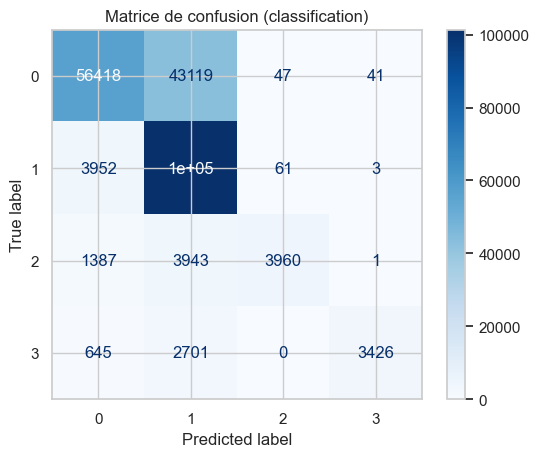

Nombre_Actions_Annuel            0.379626
Score_Reference_Croisee          0.255659
Nombre_Distribution_par_Theme    0.199117
Score_Cluster_Territoire         0.069067
classe_densite_F                 0.032205
Nombre_Lieux_Activite            0.023142
Densité_par_habitant             0.009126
classe_densite_encoded           0.008031
cluster_Cluster B                0.006088
Taux_Partenariat                 0.005449
cluster_Cluster D                0.004984
classe_densite_D                 0.003921
classe_densite_E                 0.001865
classe_densite_H                 0.000845
classe_densite_B                 0.000806
classe_densite_A                 0.000032
classe_densite_C                 0.000018
cluster_Cluster A                0.000017
cluster_Cluster E                0.000001
classe_densite_G                 0.000000
dtype: float64

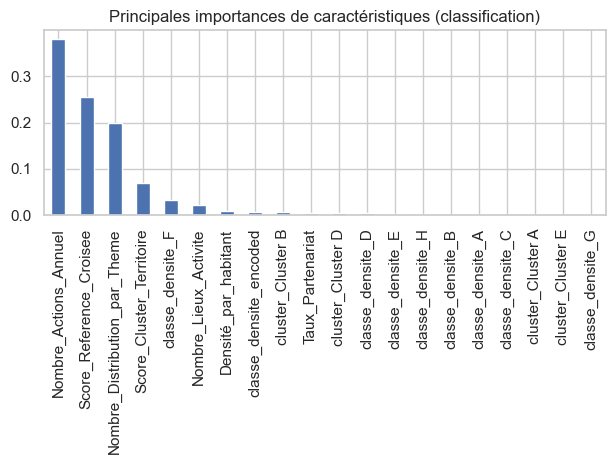

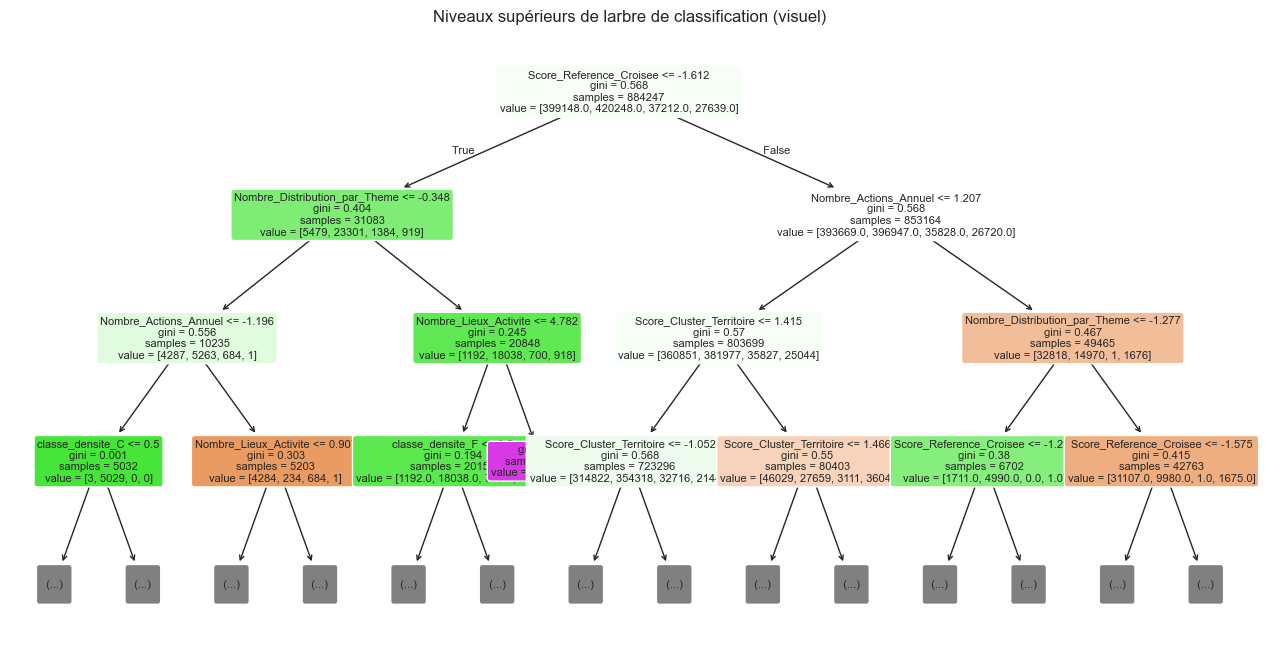

Modèle enregistré : best_decision_tree_classifier.joblib


In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import ConfusionMatrixDisplay

if classification_target is not None and classification_target in df.columns:
    Xtr, Xte, ytr, yte, preproc_clf, num_feats_clf, cat_feats_clf = prepare_data(df, classification_target)

    clf_pipeline = Pipeline(steps=[('preproc', preproc_clf), ('clf', DecisionTreeClassifier(random_state=0))])

    param_grid_clf = {
        'clf__criterion': ['gini', 'entropy'],
        'clf__max_depth': [7, 8, 9, 10, 12],
        'clf__min_samples_split': [4, 5, 6, 8],
        'clf__min_samples_leaf': [3, 4, 5, 6],
    }

    print ('Colonne cible: ', classification_target)
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
    grid_clf = GridSearchCV(clf_pipeline, param_grid_clf, cv=cv, scoring='f1_macro', n_jobs=-1, verbose=1)
    grid_clf.fit(Xtr, ytr)

    print('Meilleurs paramètres (classification) :', grid_clf.best_params_)
    best_clf = grid_clf.best_estimator_

    # Diagnostic TRAIN vs TEST pour détecter l'overfitting
    ytrain_pred = best_clf.predict(Xtr)
    train_acc = accuracy_score(ytr, ytrain_pred)
    train_f1 = f1_score(ytr, ytrain_pred, average='macro')

    # Évaluation sur le jeu de test
    ypred = best_clf.predict(Xte)
    test_acc = accuracy_score(yte, ypred)
    test_f1 = f1_score(yte, ypred, average='macro')

    print('\n=== DIAGNOSTIC OVERFITTING (Classification) ===')
    print(f'Accuracy  TRAIN: {train_acc:.4f} | TEST: {test_acc:.4f} | Écart: {train_acc - test_acc:.4f}')
    print(f'F1 (macro) TRAIN: {train_f1:.4f} | TEST: {test_f1:.4f} | Écart: {train_f1 - test_f1:.4f}')

    if (train_acc - test_acc) > 0.15 or (train_f1 - test_f1) > 0.15:
        print('⚠️ OVERFITTING DÉTECTÉ ! Écart train-test > 15%')
    else:
        print('✓ Écart train-test acceptable')

    print('\nRapport de classification (test) :')
    print(classification_report(yte, ypred))

    # Matrice de confusion
    disp = ConfusionMatrixDisplay(confusion_matrix(yte, ypred))
    disp.plot(cmap='Blues')
    plt.title('Matrice de confusion (classification)')
    plt.show()

    # Importances des caractéristiques (reconstruction via le préprocesseur)
    # Récupération des noms de caractéristiques après prétraitement
    preproc = best_clf.named_steps['preproc']
    clf_step = best_clf.named_steps['clf']
    try:
        # noms numériques en premier
        num_names = num_feats_clf
        # catégories one-hot
        ohe = preproc.named_transformers_['cat'].named_steps['onehot']
        cat_names = list(ohe.get_feature_names_out(cat_feats_clf)) if cat_feats_clf else []
        feature_names = list(num_names) + cat_names
    except Exception:
        feature_names = None

    if feature_names is not None:
        importances = clf_step.feature_importances_
        fi = pd.Series(importances, index=feature_names).sort_values(ascending=False)
        display(fi.head(20))
        fi.head(20).plot(kind='bar')
        plt.title('Principales importances de caractéristiques (classification)')
        plt.tight_layout(); plt.show()

    # Affichage de l'arbre (profondeur faible pour lisibilité)
    plt.figure(figsize=(16,8))
    plot_tree(clf_step, max_depth=3, feature_names=(feature_names if feature_names is not None else None), filled=True, rounded=True, fontsize=8)
    plt.title('Niveaux supérieurs de larbre de classification (visuel)')
    plt.show()

    # Sauvegarde du modèle
    joblib.dump(best_clf, 'best_decision_tree_classifier.joblib')
    print('Modèle enregistré : best_decision_tree_classifier.joblib')
else:
    print('Aucune cible de classification valide définie. Définissez `classification_target` avec un nom de colonne présent dans le DataFrame.')

## Régression : Arbre de décision (recherche par grille des hyperparamètres optimaux)
Processus similaire pour la régression ; le score utilisé est l'erreur quadratique moyenne négative (nous affichons le RMSE).

Colonnes FK détectées et exclues des caractéristiques : ['fk_SE_Id', 'Time_id_fk', 'fk_RNA_ID', 'fk_Geographie_Id']
Fitting 5 folds for each of 60 candidates, totalling 300 fits
Colonne cible:  Nombre_Distribution_par_Theme
Meilleurs paramètres (régression) : {'reg__criterion': 'squared_error', 'reg__max_depth': 12, 'reg__min_samples_leaf': 3, 'reg__min_samples_split': 8}

=== DIAGNOSTIC OVERFITTING (Régression) ===
RMSE  TRAIN: 18.2699 | TEST: 18.2474 | Écart: 0.0226
R2    TRAIN: 0.5896 | TEST: 0.5899 | Écart: -0.0003
✓ Écart train-test acceptable


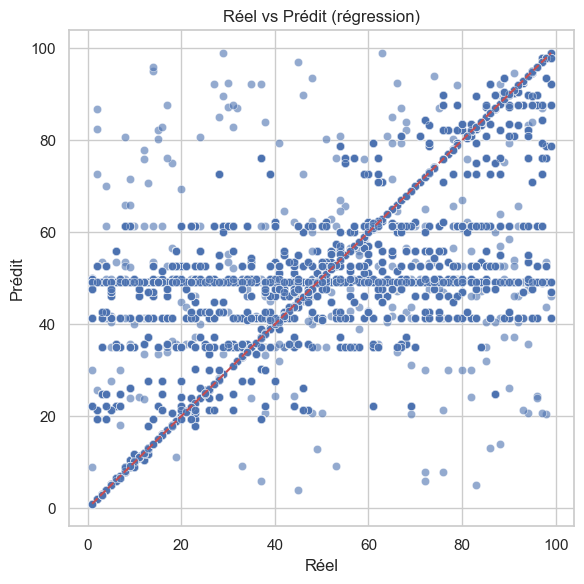

Nombre_Actions_Annuel       0.404453
Score_Reference_Croisee     0.347386
Score_Cluster_Territoire    0.122222
classe_densite_F            0.034772
Nombre_Lieux_Activite       0.032056
Taux_Distribution_Theme     0.027061
cluster_Cluster A           0.009299
Densité_par_habitant        0.005586
classe_densite_C            0.005445
classe_densite_encoded      0.004847
classe_densite_B            0.001585
cluster_Cluster D           0.001365
Taux_Partenariat            0.000931
classe_densite_G            0.000813
classe_densite_E            0.000645
classe_densite_H            0.000632
classe_densite_D            0.000387
cluster_Cluster E           0.000228
classe_densite_A            0.000174
cluster_Cluster B           0.000111
dtype: float64

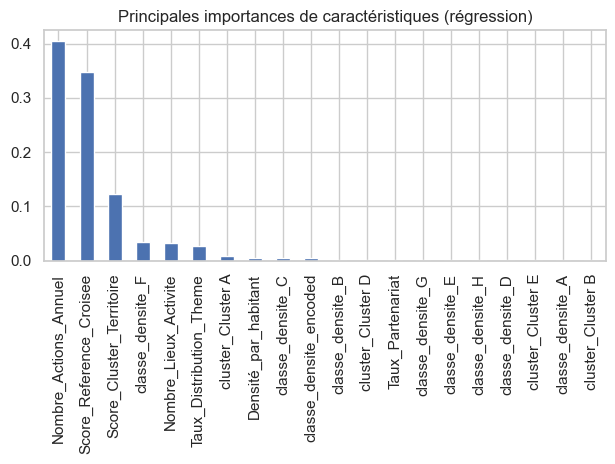

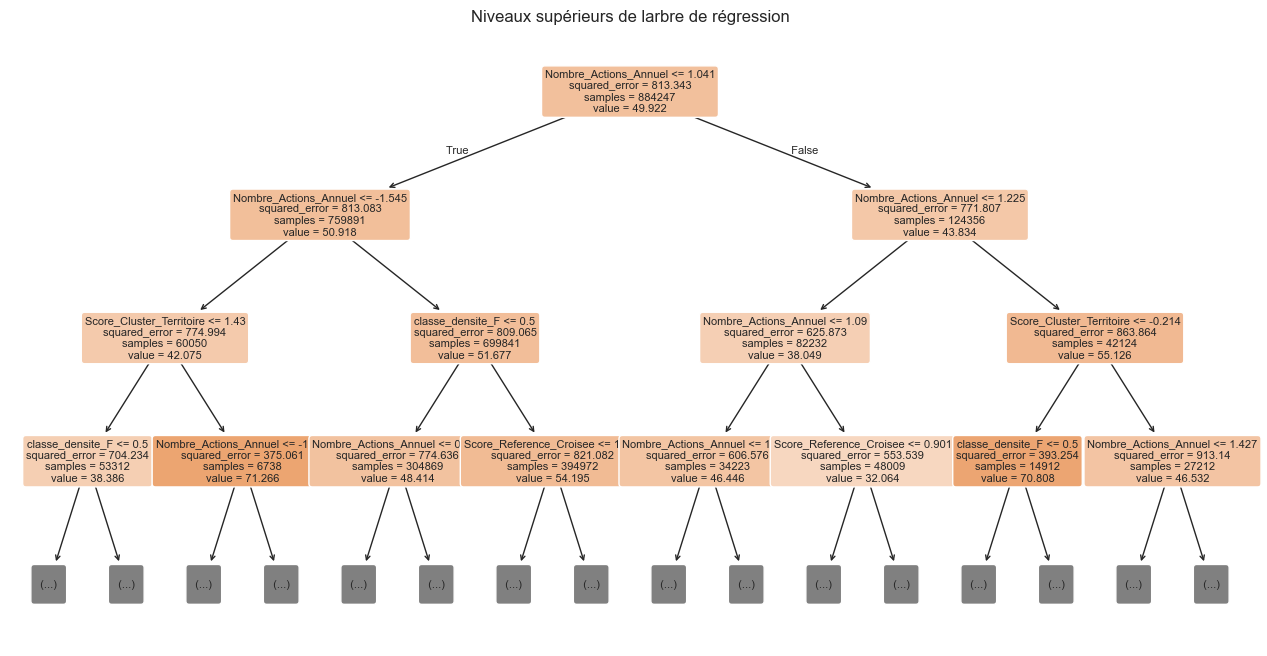

Modèle enregistré : best_decision_tree_regressor.joblib


In [ ]:
from sklearn.model_selection import KFold

if regression_target is not None and regression_target in df.columns:
    Xtr_r, Xte_r, ytr_r, yte_r, preproc_reg, num_feats_reg, cat_feats_reg = prepare_data(df, regression_target)

    reg_pipeline = Pipeline(steps=[('preproc', preproc_reg), ('reg', DecisionTreeRegressor(random_state=0))])

    param_grid_reg = {
        'reg__criterion': ['squared_error'],
        'reg__max_depth': [7, 8, 9, 10, 12],
        'reg__min_samples_split': [4, 5, 6, 8],
        'reg__min_samples_leaf': [3, 4, 5],
    }

    cv_reg = KFold(n_splits=5, shuffle=True, random_state=0)
    grid_reg = GridSearchCV(reg_pipeline, param_grid_reg, cv=cv_reg, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)
    grid_reg.fit(Xtr_r, ytr_r)
    print ('Colonne cible: ', regression_target)
    print('Meilleurs paramètres (régression) :', grid_reg.best_params_)
    best_reg = grid_reg.best_estimator_

    # Diagnostic TRAIN vs TEST pour détecter l'overfitting
    ytrain_r_pred = best_reg.predict(Xtr_r)
    train_mse_r = mean_squared_error(ytr_r, ytrain_r_pred)
    train_rmse_r = np.sqrt(train_mse_r)
    train_r2_r = r2_score(ytr_r, ytrain_r_pred)

    # Évaluation sur le jeu de test
    ypred_r = best_reg.predict(Xte_r)
    test_mse_r = mean_squared_error(yte_r, ypred_r)
    test_rmse_r = np.sqrt(test_mse_r)
    test_r2_r = r2_score(yte_r, ypred_r)

    print('\n=== DIAGNOSTIC OVERFITTING (Régression) ===')
    print(f'RMSE  TRAIN: {train_rmse_r:.4f} | TEST: {test_rmse_r:.4f} | Écart: {train_rmse_r - test_rmse_r:.4f}')
    print(f'R2    TRAIN: {train_r2_r:.4f} | TEST: {test_r2_r:.4f} | Écart: {train_r2_r - test_r2_r:.4f}')

    if (train_r2_r - test_r2_r) > 0.15 or (train_rmse_r - test_rmse_r) > (test_rmse_r * 0.25):
        print('⚠️ OVERFITTING DÉTECTÉ ! Écart train-test significatif')
    else:
        print('✓ Écart train-test acceptable')

    # Nuage : réel vs prédit
    plt.figure(figsize=(6,6))
    sns.scatterplot(x=yte_r, y=ypred_r, alpha=0.6)
    plt.plot([yte_r.min(), yte_r.max()], [yte_r.min(), yte_r.max()], 'r--')
    plt.xlabel('Réel')
    plt.ylabel('Prédit')
    plt.title('Réel vs Prédit (régression)')
    plt.tight_layout(); plt.show()

    # Importances des caractéristiques pour la régression
    try:
        preproc = best_reg.named_steps['preproc']
        reg_step = best_reg.named_steps['reg']
        num_names = num_feats_reg
        ohe = preproc.named_transformers_['cat'].named_steps['onehot']
        cat_names = list(ohe.get_feature_names_out(cat_feats_reg)) if cat_feats_reg else []
        feature_names_reg = list(num_names) + cat_names
        importances_r = reg_step.feature_importances_
        fi_r = pd.Series(importances_r, index=feature_names_reg).sort_values(ascending=False)
        display(fi_r.head(20))
        fi_r.head(20).plot(kind='bar')
        plt.title('Principales importances de caractéristiques (régression)')
        plt.tight_layout(); plt.show()
    except Exception as e:
        print('Impossible de reconstruire les noms des caractéristiques :', e)

    # Affichage d'un petit sous-arbre pour la lisibilité
    try:
        plt.figure(figsize=(16,8))
        plot_tree(reg_step, max_depth=3, feature_names=(feature_names_reg if 'feature_names_reg' in locals() else None), filled=True, rounded=True, fontsize=8)
        plt.title('Niveaux supérieurs de larbre de régression')
        plt.show()
    except Exception as e:
        print('Échec du tracé de larbre :', e)

    joblib.dump(best_reg, 'best_decision_tree_regressor.joblib')
    print('Modèle enregistré : best_decision_tree_regressor.joblib')
else:
    print('Aucune cible de régression valide définie. Définissez `regression_target` avec un nom de colonne présent dans le DataFrame.')

## Remarques et prochaines étapes
- Si la sélection automatique des cibles ne correspond pas à ce que vous souhaitez, définissez `classification_target` et/ou `regression_target` sur les noms de colonnes souhaités puis relancez les cellules correspondantes.
- Les grilles ci‑dessous sont volontairement modestes pour la rapidité ; augmentez les plages pour une recherche plus exhaustive.
- Pour des cibles de classification déséquilibrées, envisagez `class_weight='balanced'` dans le classifieur ou des techniques d'échantillonnage.
- Si votre jeu de données est volumineux, envisagez `RandomizedSearchCV` ou limitez `n_jobs` pour contrôler les ressources.

Souhaitez‑vous que j'exécute ce notebook ici (exécution des cellules) et que je retourne les résultats optimisés et les modèles sauvegardés ? Si oui, je peux exécuter les cellules et rapporter les meilleurs paramètres et métriques.

In [ ]:
import pandas as pd
import joblib
import re
import numpy as np

# Helper function to get the features (X) and identify FK columns for prediction
# This function mirrors the logic in `prepare_data` to ensure consistency in feature selection
def get_features_for_prediction(dataframe, target_col, extra_drop_cols=None):
    if target_col is None or target_col not in dataframe.columns:
        raise ValueError(f"Target column '{target_col}' not found in DataFrame.")

    drop_cols_local = extra_drop_cols or []

    # Detect FK columns using the same regex as in prepare_data
    fk_pattern = re.compile(r'(^id$|_id$|^id_|fk|_fk$|^fk_)', re.I)
    detected_fk_cols = [c for c in dataframe.columns if fk_pattern.search(c)]
    # Ensure the target column is not considered an FK to be dropped if it looks like one
    detected_fk_cols = [c for c in detected_fk_cols if c != target_col]

    # Combine all columns to drop from features
    cols_to_drop_from_X = list(dict.fromkeys([target_col] + drop_cols_local + detected_fk_cols))
    X_for_prediction = dataframe.drop(columns=cols_to_drop_from_X)

    # Dimension keys include detected FKs and the 'cluster' column if present
    potential_dimension_keys = detected_fk_cols + ['cluster']
    dimension_keys = [k for k in potential_dimension_keys if k in dataframe.columns]

    return X_for_prediction, dimension_keys

print("Démarrage de l'exportation du modèle et des prédictions...")

# --- Exportation du modèle de classification et des prédictions ---
# Ces variables (best_clf, classification_target, num_feats_clf, cat_feats_clf) sont définies dans les cellules précédentes.
if 'best_clf' in locals() and classification_target is not None and classification_target in df.columns:
    print(f"\nTraitement de la cible de classification : {classification_target}")

    # Sauvegarde des caractéristiques de classification
    joblib.dump(num_feats_clf, 'classification_numeric_features.pkl')
    joblib.dump(cat_feats_clf, 'classification_categorical_features.pkl')
    print('Caractéristiques numériques de classification sauvegardées dans classification_numeric_features.pkl')
    print('Caractéristiques catégorielles de classification sauvegardées dans classification_categorical_features.pkl')

    # Préparation des données pour la prédiction sur l'ensemble du DataFrame
    X_full_clf_raw, clf_dimension_keys = get_features_for_prediction(df, classification_target)

    # Effectuer les prédictions avec le pipeline complet
    full_clf_predictions = best_clf.predict(X_full_clf_raw)

    # Création et exportation du DataFrame de prédictions
    predictions_df_clf = df[clf_dimension_keys].copy()
    predictions_df_clf[f'predicted_{classification_target}'] = full_clf_predictions

    output_filename_clf_csv = 'classification_predictions_with_keys.csv'
    predictions_df_clf.to_csv(output_filename_clf_csv, index=False)
    print(f'Prédictions de classification sauvegardées dans {output_filename_clf_csv}')

    output_filename_clf_excel = 'classification_predictions_with_keys.xlsx'
    predictions_df_clf.to_excel(output_filename_clf_excel, index=False)
    print(f'Prédictions de classification sauvegardées dans {output_filename_clf_excel}')

else:
    print('Modèle ou cible de classification non disponible pour l\'exportation.')

# --- Exportation du modèle de régression et des prédictions ---
# Ces variables (best_reg, regression_target, num_feats_reg, cat_feats_reg) sont définies dans les cellules précédentes.
if 'best_reg' in locals() and regression_target is not None and regression_target in df.columns:
    print(f"\nTraitement de la cible de régression : {regression_target}")

    # Sauvegarde des caractéristiques de régression
    joblib.dump(num_feats_reg, 'regression_numeric_features.pkl')
    joblib.dump(cat_feats_reg, 'regression_categorical_features.pkl')
    print('Caractéristiques numériques de régression sauvegardées dans regression_numeric_features.pkl')
    print('Caractéristiques catégorielles de régression sauvegardées dans regression_categorical_features.pkl')

    # Préparation des données pour la prédiction sur l'ensemble du DataFrame
    X_full_reg_raw, reg_dimension_keys = get_features_for_prediction(df, regression_target)

    # Effectuer les prédictions avec le pipeline complet
    full_reg_predictions = best_reg.predict(X_full_reg_raw)

    # Création et exportation du DataFrame de prédictions
    predictions_df_reg = df[reg_dimension_keys].copy()
    predictions_df_reg[f'predicted_{regression_target}'] = full_reg_predictions

    output_filename_reg_csv = 'regression_predictions_with_keys.csv'
    predictions_df_reg.to_csv(output_filename_reg_csv, index=False)
    print(f'Prédictions de régression sauvegardées dans {output_filename_reg_csv}')

    output_filename_reg_excel = 'regression_predictions_with_keys.xlsx'
    predictions_df_reg.to_excel(output_filename_reg_excel, index=False)
    print(f'Prédictions de régression sauvegardées dans {output_filename_reg_excel}')

else:
    print('Modèle ou cible de régression non disponible pour l\'exportation.')

print("\nProcessus d'exportation terminé.")